In [ ]:
# Import required libraries
from google.colab import drive
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the pre-trained model
model_path = "/content/drive/MyDrive/Project CV/best_model_w_o_resize.h5"
model = tf.keras.models.load_model(model_path, compile=False)

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


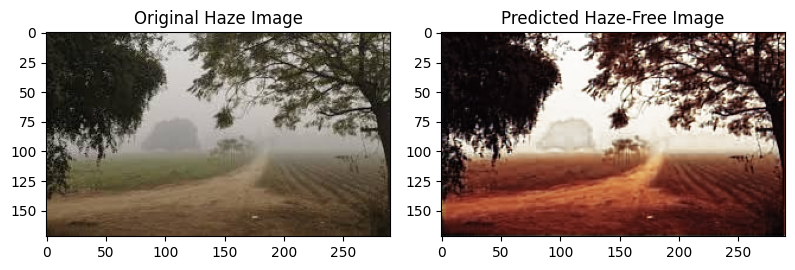

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/Project CV/lahore.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preprocess the image
img = img.astype(np.float32) / 255.0  # Normalize
img = img[np.newaxis, :, :, :]  # Add batch dimension

# Predict the haze-free image
pred_img = model.predict(img)

# Plotting
plt.figure(figsize=(12, 6))

# Original image (haze)
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(img))
plt.title("Original Haze Image")

# Haze-free predicted image
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(pred_img))
plt.title("Predicted Haze-Free Image")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


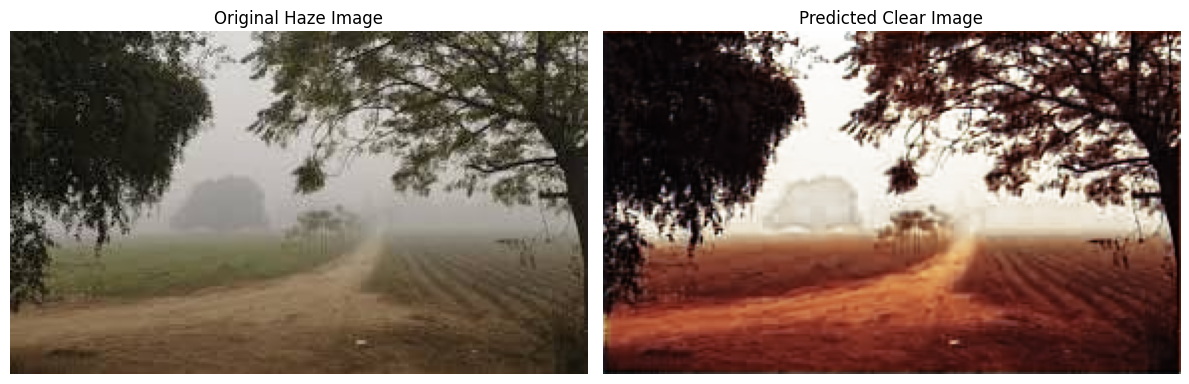

Clear image saved at /content/drive/MyDrive/Project CV/lahore.png


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Path to the specific image
image_path = "/content/drive/MyDrive/Project CV/lahore.jpeg"

# Load the image
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"Image not found at path: {image_path}")

# Convert the image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h_img = img_rgb  # Original hazy image

# Normalize the image
img_scaled = img_rgb.astype(np.float32) / 255.0
img_scaled = img_scaled[np.newaxis, :, :, :]  # Add batch dimension

# Predict the clear image using the trained model
pred_img = model.predict(img_scaled)
pred_img = np.squeeze(pred_img)  # Remove batch dimension

# Display the original hazy image and the predicted clear image
plt.figure(figsize=(12, 6))

# Plot the original hazy image
plt.subplot(1, 2, 1)
plt.imshow(h_img)
plt.title("Original Haze Image")
plt.axis('off')

# Plot the predicted clear image
plt.subplot(1, 2, 2)
plt.imshow(pred_img)
plt.title("Predicted Clear Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the predicted clear image
output_path = "/content/drive/MyDrive/Project CV/lahore.png"
pred_img_uint8 = (pred_img * 255).astype(np.uint8)  # Convert to uint8
cv2.imwrite(output_path, cv2.cvtColor(pred_img_uint8, cv2.COLOR_RGB2BGR))
print(f"Clear image saved at {output_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


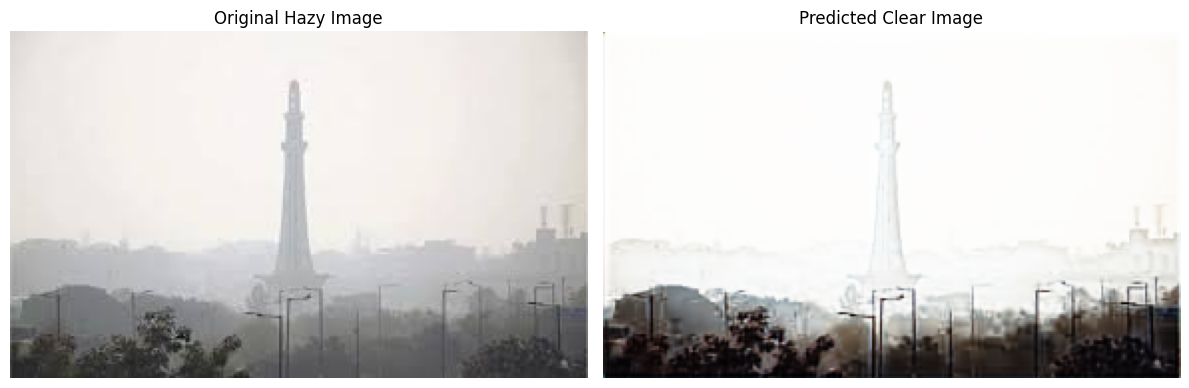

Dehazed image saved at /content/drive/MyDrive/Project CV/clear_download.png


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def load_and_preprocess_image(image_path):
    """
    Load and preprocess an image for haze removal.

    Parameters:
    - image_path (str): Path to the input image.

    Returns:
    - img_rgb (np.array): Original RGB image.
    - img_scaled (np.array): Preprocessed image ready for prediction.
    """
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize to [0, 1]
    img_scaled = img_rgb.astype(np.float32) / 255.0

    # Add batch dimension
    img_scaled = img_scaled[np.newaxis, :, :, :]

    return img_rgb, img_scaled

def postprocess_image(pred_img):
    """
    Postprocess the predicted image to convert it to displayable format.

    Parameters:
    - pred_img (np.array): Predicted image from the model.

    Returns:
    - pred_img_uint8 (np.array): Processed image in uint8 format.
    """
    # Squeeze to remove unnecessary dimensions
    pred_img = np.squeeze(pred_img)

    # Normalize to [0, 1]
    pred_img = (pred_img - pred_img.min()) / (pred_img.max() - pred_img.min())

    # Convert to uint8
    pred_img_uint8 = (pred_img * 255).astype(np.uint8)

    return pred_img_uint8

def display_and_save_images(original_img, predicted_img, output_path):
    """
    Display and save the original and predicted images.

    Parameters:
    - original_img (np.array): Original hazy image.
    - predicted_img (np.array): Predicted dehazed image.
    - output_path (str): Path to save the dehazed image.
    """
    # Display the images
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Hazy Image")
    plt.axis('off')

    # Predicted image
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_img)
    plt.title("Predicted Clear Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Save the predicted image
    cv2.imwrite(output_path, cv2.cvtColor(predicted_img, cv2.COLOR_RGB2BGR))
    print(f"Dehazed image saved at {output_path}")

# Path to the input image
image_path = "/content/drive/MyDrive/Project CV/minar.jpeg"

# Path to save the output
output_path = "/content/drive/MyDrive/Project CV/clear_download.png"

# Load and preprocess the image
original_img, preprocessed_img = load_and_preprocess_image(image_path)

# Predict the dehazed image
predicted_img = model.predict(preprocessed_img)

# Postprocess the predicted image
predicted_img_uint8 = postprocess_image(predicted_img)

# Display and save the images
display_and_save_images(original_img, predicted_img_uint8, output_path)


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Function to calculate PSNR
def calculate_psnr(pred_img, clear_img):
    mse = np.mean((pred_img - clear_img) ** 2)
    if mse == 0:
        return 100  # Perfect score
    max_pixel = 1.0  # Normalized images
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate SSIM with dynamic win_size adjustment
def calculate_ssim(pred_img, clear_img):
    """
    Calculate SSIM with dynamic win_size adjustment.

    Parameters:
    - pred_img: Predicted image.
    - clear_img: Ground truth image.

    Returns:
    - SSIM score.
    """
    # Get the minimum image dimension
    min_dim = min(pred_img.shape[0], pred_img.shape[1])

    # Dynamically set win_size
    if min_dim < 7:
        win_size = min_dim  # Use the smallest dimension as win_size
        if win_size % 2 == 0:  # Ensure win_size is odd
            win_size -= 1
    else:
        win_size = 7  # Default value for larger images

    # Calculate SSIM with data_range=1.0 (assuming images are in [0, 1] range)
    ssim_index, _ = ssim(
        clear_img,
        pred_img,
        full=True,
        multichannel=True,
        channel_axis=-1,  # Specify channel axis for color images
        win_size=win_size,
        data_range=1.0  # Add data_range parameter
    )
    return ssim_index

# Function to evaluate the model
def evaluate_model(model, test_images, ground_truth_images):
    """
    Evaluate the model using MSE, PSNR, and SSIM.

    Parameters:
    - model: Trained model for haze removal.
    - test_images: List of paths to hazy test images.
    - ground_truth_images: List of paths to corresponding ground truth clear images.

    Returns:
    - Averages of MSE, PSNR, and SSIM for the test set.
    """
    mse_scores, psnr_scores, ssim_scores = [], [], []

    for hazy_path, clear_path in zip(test_images, ground_truth_images):
        # Load and preprocess hazy image
        hazy_img = cv2.imread(hazy_path)
        hazy_img = cv2.cvtColor(hazy_img, cv2.COLOR_BGR2RGB)
        hazy_img = hazy_img.astype(np.float32) / 255.0
        hazy_img = hazy_img[np.newaxis, :, :, :]  # Add batch dimension

        # Load ground truth clear image
        clear_img = cv2.imread(clear_path)
        clear_img = cv2.cvtColor(clear_img, cv2.COLOR_BGR2RGB)
        clear_img = clear_img.astype(np.float32) / 255.0

        # Predict dehazed image
        pred_img = model.predict(hazy_img)
        pred_img = np.squeeze(pred_img)  # Remove batch dimension

        # Print shapes for debugging
        print(f"Predicted shape: {pred_img.shape}, Clear shape: {clear_img.shape}")

        # Calculate metrics
        mse = mean_squared_error(clear_img.flatten(), pred_img.flatten())
        psnr = calculate_psnr(pred_img, clear_img)
        ssim_score = calculate_ssim(pred_img, clear_img)

        mse_scores.append(mse)
        psnr_scores.append(psnr)
        ssim_scores.append(ssim_score)

    # Average scores
    avg_mse = np.mean(mse_scores)
    avg_psnr = np.mean(psnr_scores)
    avg_ssim = np.mean(ssim_scores)

    return avg_mse, avg_psnr, avg_ssim

# Example test data
test_images = ["/content/drive/MyDrive/Project CV/lahore.jpeg", "/content/drive/MyDrive/Project CV/minar.jpeg"]  # Hazy images
ground_truth_images = ["/content/drive/MyDrive/Project CV/lahore.png", "/content/drive/MyDrive/Project CV/clear_download.png"]  # Corresponding clear images

# Evaluate model (replace 'model' with your actual trained model)
avg_mse, avg_psnr, avg_ssim = evaluate_model(model, test_images, ground_truth_images)

# Print results
print(f"Average MSE: {avg_mse}")
print(f"Average PSNR: {avg_psnr} dB")
print(f"Average SSIM: {avg_ssim}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted shape: (172, 290, 3), Clear shape: (172, 290, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted shape: (174, 290, 3), Clear shape: (174, 290, 3)
Average MSE: 6.214110726432409e-06
Average PSNR: 52.1332261170324 dB
Average SSIM: 0.9993935823440552


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Function to calculate PSNR
def calculate_psnr(pred_img, clear_img):
    mse = np.mean((pred_img - clear_img) ** 2)
    if mse == 0:
        return 100  # Perfect score
    max_pixel = 1.0  # Normalized images
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate SSIM with dynamic win_size adjustment
def calculate_ssim(pred_img, clear_img):
    """
    Calculate SSIM with dynamic win_size adjustment.

    Parameters:
    - pred_img: Predicted image.
    - clear_img: Ground truth image.

    Returns:
    - SSIM score.
    """
    # Get the minimum image dimension
    min_dim = min(pred_img.shape[0], pred_img.shape[1])

    # Dynamically set win_size
    if min_dim < 7:
        win_size = min_dim  # Use the smallest dimension as win_size
        if win_size % 2 == 0:  # Ensure win_size is odd
            win_size -= 1
    else:
        win_size = 7  # Default value for larger images

    # Calculate SSIM with data_range=1.0 (assuming images are in [0, 1] range)
    ssim_index, _ = ssim(
        clear_img,
        pred_img,
        full=True,
        multichannel=True,
        channel_axis=-1,  # Specify channel axis for color images
        win_size=win_size,
        data_range=1.0  # Add data_range parameter
    )
    return ssim_index

# Function to evaluate the model
def evaluate_model(model, test_images, ground_truth_images):
    """
    Evaluate the model using MSE, PSNR, and SSIM.

    Parameters:
    - model: Trained model for haze removal.
    - test_images: List of paths to hazy test images.
    - ground_truth_images: List of paths to corresponding ground truth clear images.

    Returns:
    - Averages of MSE, PSNR, and SSIM for the test set and the SSIM scores.
    """
    mse_scores, psnr_scores, ssim_scores = [], [], []

    for hazy_path, clear_path in zip(test_images, ground_truth_images):
        # Load and preprocess hazy image
        hazy_img = cv2.imread(hazy_path)
        hazy_img = cv2.cvtColor(hazy_img, cv2.COLOR_BGR2RGB)
        hazy_img = hazy_img.astype(np.float32) / 255.0
        hazy_img = hazy_img[np.newaxis, :, :, :]  # Add batch dimension

        # Load ground truth clear image
        clear_img = cv2.imread(clear_path)
        clear_img = cv2.cvtColor(clear_img, cv2.COLOR_BGR2RGB)
        clear_img = clear_img.astype(np.float32) / 255.0

        # Predict dehazed image
        pred_img = model.predict(hazy_img)
        pred_img = np.squeeze(pred_img)  # Remove batch dimension

        # Print shapes for debugging
        print(f"Predicted shape: {pred_img.shape}, Clear shape: {clear_img.shape}")

        # Calculate metrics
        mse = mean_squared_error(clear_img.flatten(), pred_img.flatten())
        psnr = calculate_psnr(pred_img, clear_img)
        ssim_score = calculate_ssim(pred_img, clear_img)

        mse_scores.append(mse)
        psnr_scores.append(psnr)
        ssim_scores.append(ssim_score)

    # Average scores
    avg_mse = np.mean(mse_scores)
    avg_psnr = np.mean(psnr_scores)
    avg_ssim = np.mean(ssim_scores)

    # Return average metrics along with SSIM scores
    return avg_mse, avg_psnr, avg_ssim, ssim_scores  # Return the SSIM scores as well

# Function to calculate accuracy based on SSIM
def calculate_accuracy(ssim_scores, threshold=0.9):
    """
    Calculate the accuracy based on SSIM score exceeding a threshold.

    Parameters:
    - ssim_scores: List of SSIM scores for all predictions.
    - threshold: The SSIM threshold for considering a prediction as accurate.

    Returns:
    - Accuracy percentage.
    """
    accurate_predictions = [score > threshold for score in ssim_scores]
    accuracy = np.mean(accurate_predictions) * 100
    return accuracy

# Example test data
test_images = ["/content/drive/MyDrive/Project CV/lahore.jpeg", "/content/drive/MyDrive/Project CV/minar.jpeg"]  # Hazy images
ground_truth_images = ["/content/drive/MyDrive/Project CV/lahore.png", "/content/drive/MyDrive/Project CV/clear_download.png"]  # Corresponding clear images

# Load the pre-trained model (replace with your actual model)
model_path = "/content/drive/MyDrive/Project CV/best_model_w_o_resize.h5"
model = tf.keras.models.load_model(model_path, compile=False)

# Evaluate model (replace 'model' with your actual trained model)
avg_mse, avg_psnr, avg_ssim, ssim_scores = evaluate_model(model, test_images, ground_truth_images)

# Print results
print(f"Average MSE: {avg_mse}")
print(f"Average PSNR: {avg_psnr} dB")
print(f"Average SSIM: {avg_ssim}")

# Calculate accuracy based on SSIM
accuracy = calculate_accuracy(ssim_scores)
print(f"Accuracy based on SSIM > 0.9: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Predicted shape: (172, 290, 3), Clear shape: (172, 290, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Predicted shape: (174, 290, 3), Clear shape: (174, 290, 3)
Average MSE: 6.214110726432409e-06
Average PSNR: 52.1332261170324 dB
Average SSIM: 0.9993935823440552
Accuracy based on SSIM > 0.9: 100.00%


**MSE (Mean Squared Error):**

Lower values indicate that the predicted (dehazed) image is closer to the ground truth (clear image).

MSE close to zero means the model has successfully removed the haze and restored the image to a similar quality as the clear version.

**PSNR (Peak Signal-to-Noise Ratio):**

Higher values are better and indicate that the predicted image has less noise and distortion.
A PSNR higher than 30 dB generally suggests that the image quality is good, with lower distortion.

**SSIM (Structural Similarity Index):**

SSIM values close to 1 indicate that the structural integrity of the image has been well-preserved after haze removal.
SSIM > 0.9 is an excellent score, suggesting the dehazed image is highly similar to the ground truth, particularly in terms of structure, texture, and brightness.